# Project Description

## Context & Objective

The second-hand phone business/industry is poised for significant growth in the near to medium future with the IDC (Internation Data Corporation) predicting a whooping \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023.

There are many advantages to using a used cell phone:  
1. Significant cost savings with warranties
2. Increases the life of the cell phone - Environmentally friendly 

ReCell is a start-up looking to take advantage of the potential boom in the industry and are looking to use ML to understand the dynamics.

Build a linear regression model that predicts the price of a used phone and identify factors that significantly influence the price.  


### Data Information:  
brand_name: Name of manufacturing brand  
os: OS on which the phone runs  
screen_size: Size of the screen in cm  
4g: Whether 4G is available or not  
5g: Whether 5G is available or not  
main_camera_mp: Resolution of the rear camera in megapixels  
selfie_camera_mp: Resolution of the front camera in megapixels  
int_memory: Amount of internal memory (ROM) in GB  
ram: Amount of RAM in GB  
battery: Energy capacity of the phone battery in mAh  
weight: Weight of the phone in grams  
release_year: Year when the phone model was released  
days_used: Number of days the used/refurbished phone has been used  
new_price: Price of a new phone of the same model in euros  
used_price: Price of the used/refurbished phone in euros  

### 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 

#Visualization Libraries:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

#statistical and regression Libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.diagnostic as sms

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels'

In [5]:
pip install statsmodel

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
Note: you may need to restart the kernel to use updated packages.


### 2. Import the Data Set

In [2]:
df=pd.read_csv('used_phone_data.csv')
df.shape

(3571, 15)

There are 3571 rows of data and 15 columns. 

In [3]:
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


In [4]:
df.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80
5,Honor,Android,21.43,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,157.70,113.67
6,Honor,Android,19.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,91.74,72.29
7,Honor,Android,18.57,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,179.24,132.91
8,Honor,Android,15.72,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,150.88
9,Honor,Android,21.43,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,159.75,103.59


In [5]:
df.tail(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3561,Apple,iOS,11.27,yes,no,12.0,7.0,64.0,3.0,1821.0,148.0,2020,235,356.1500,263.75
3562,Apple,iOS,16.03,yes,no,8.0,7.0,64.0,4.0,3969.0,226.0,2019,298,840.6500,592.09
3563,Apple,iOS,13.97,yes,no,8.0,7.0,64.0,4.0,3046.0,188.0,2019,351,823.6500,535.75
3564,Apple,iOS,15.40,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,538.0415,401.39
3565,Asus,Android,24.61,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,1163.6500,756.99
3566,Asus,Android,15.88,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07
3570,Alcatel,Android,13.49,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.2415,50.48


Generally the data set looks OK. You can notice some missing values already in the "main_camera_mp" column. Immediately, I know that a phone's connectivity capability, 4g or 5g will be a useful variable so I will be looking to change those into categorical variables. I also believe that the operating system will also play a role in the determining the price of the phone. so I will be looking to change that to a categorical variable as well. 

In [6]:
df.info() # to get some high level infomation on the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


It seems that from column 5-10 there are some missing values that would be worth exploring and treating

## Missing Values

In [7]:
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
ram                  10
int_memory           10
weight                7
battery               6
selfie_camera_mp      2
used_price            0
new_price             0
days_used             0
release_year          0
5g                    0
4g                    0
screen_size           0
os                    0
brand_name            0
dtype: int64

From the above we can see that the 'main_camera_mp' is the feature with the most missing values. Lets dig a bit more to see what brand of phones are the main culprits. There are several options to deal with the missing data at this point:  
1. drop all the rows with missing data 
2. Drop the rear camera mega pixel column 
3. Fill in the data

As I am not sure of the feature importance of this variable at this moment I look at the general correlation of the features. the missing values do not represent the majority of the data so we could still get useful data from the correlation. 

In [8]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.189274,0.370251,0.143750,0.283320,0.741848,0.634869,0.454596,-0.397210,0.342092,0.385928
main_camera_mp,0.189274,1.000000,0.423704,0.004032,0.206895,0.239659,-0.073371,0.354243,-0.142915,0.360324,0.281065
selfie_camera_mp,0.370251,0.423704,1.000000,0.283188,0.445200,0.344864,-0.005384,0.696703,-0.556027,0.399368,0.497530
int_memory,0.143750,0.004032,0.283188,1.000000,0.079572,0.113488,0.017879,0.219256,-0.228636,0.343227,0.404913
ram,0.283320,0.206895,0.445200,0.079572,1.000000,0.234465,0.069766,0.311379,-0.286884,0.443403,0.522659
battery,0.741848,0.239659,0.344864,0.113488,0.234465,1.000000,0.704468,0.457467,-0.351055,0.341864,0.363767
weight,0.634869,-0.073371,-0.005384,0.017879,0.069766,0.704468,1.000000,0.062348,-0.059272,0.197986,0.170654
release_year,0.454596,0.354243,0.696703,0.219256,0.311379,0.457467,0.062348,1.000000,-0.748594,0.296972,0.456764
days_used,-0.397210,-0.142915,-0.556027,-0.228636,-0.286884,-0.351055,-0.059272,-0.748594,1.000000,-0.235613,-0.470760
new_price,0.342092,0.360324,0.399368,0.343227,0.443403,0.341864,0.197986,0.296972,-0.235613,1.000000,0.926087


Firstly I look at how much of a correlation there is between rear camera pixels and my target variable "used Price", ~0.28. Individually is not a high correlation per se but when compared to the other features we can see that it is not insignificant. so droping the column MAY loose some valuable information. Furthermore, I see that selfie camera has a strong correlation with my target variable so I am tempted to keep anything with cameras. 

In [9]:
main_camera_mp_null = df[df['main_camera_mp'].isnull()] # Segregate rows that have missing rear camera megapixel information
main_camera_mp_null.groupby('brand_name')['main_camera_mp'].value_counts(dropna=False).sort_values(ascending=False) # Count the number of missing values per brand

brand_name  main_camera_mp
Realme      NaN               36
Xiaomi      NaN               24
Oppo        NaN               20
Motorola    NaN               18
OnePlus     NaN               17
Meizu       NaN               15
Vivo        NaN               14
Infinix     NaN               10
Sony        NaN                7
ZTE         NaN                4
BlackBerry  NaN                4
Asus        NaN                4
Coolpad     NaN                3
Panasonic   NaN                2
Lava        NaN                2
Name: main_camera_mp, dtype: int64

In [10]:
df[df['brand_name']== 'Realme'].count()

brand_name          41
os                  41
screen_size         41
4g                  41
5g                  41
main_camera_mp       5
selfie_camera_mp    41
int_memory          41
ram                 41
battery             41
weight              41
release_year        41
days_used           41
new_price           41
used_price          41
dtype: int64

secondly, we can see that in the case of Realme, 36 out of 41 data points dont have the rear camera pixel data. So indidcates that if we reomove all the rows with missing data, we may loose whole brand. 
The last option is to fill in the data.

To get an idea on where to start, I refer back to the correlation table to get an indication on the major affectants on the "main_camera_MP):  
The three (3) highest correlated features are th year released, selfie camera and price of a new phone. since the price of a new phone is colinked to the target variable, we will focus on just the year and the selfie camera to garner information that may help us fill in the missing values for the rear camera MegaPixels.

Realme has the most missing data in the sub group of data without rear camera pixels. From below we can see that the most of the missing data come from models released in 2019 and 2020. A google search of Realme phone shows that Realme is an offshoot of Oppo. Further down we have compared Oppo models for 2019 2020, cursory overview does not show major differeces. We will update Realme 2019 data with Oppo 2019 data. However they both still dont have 2020 data. Further google search on the website (https://www.gsmarena.com/realme-phones-118.php) provide some insight. Oppo/Realme models for 2020 both have similar rear camera specification of 8 MP. both data sets will be update with 8MP

In [11]:
# # df_realme = df[df['brand_name']=='Realme'].set_index(['release_year','selfie_camera_mp'])
# # df_Oppo = df[df['brand_name']=='Oppo'].set_index(['release_year','selfie_camera_mp'])
# # df_xiaomi = df[df['brand_name']=='Xiaomi'].set_index(['release_year','selfie_camera_mp'])
# # df_moto = df[df['brand_name']=='Motorola'].set_index(['release_year','selfie_camera_mp'])
# # df_1plus = df[df['brand_name']=='OnePlus'].set_index(['release_year','selfie_camera_mp'])
# df_meizu = df[df['brand_name']=='Meizu'].set_index(['release_year','selfie_camera_mp'])
# df_vivo = df[df['brand_name']=='Vivo'].set_index(['release_year','selfie_camera_mp'])
# df_infinix = df[df['brand_name']=='Infinix'].set_index(['release_year','selfie_camera_mp'])
# df_sony = df[df['brand_name']=='Sony'].set_index(['release_year','selfie_camera_mp'])
# df_ZTE = df[df['brand_name']=='ZTE'].set_index(['release_year','selfie_camera_mp'])
# df_bb = df[df['brand_name']=='BlackBerry'].set_index(['release_year','selfie_camera_mp'])
# df_asus = df[df['brand_name']=='Asus'].set_index(['release_year','selfie_camera_mp'])
# df_other = df[(df['brand_name']=='Coolpad') | (df['brand_name']=='Panasonic') | (df['brand_name']=='Lava')].set_index(['release_year','selfie_camera_mp'])

print('Realme missing Data Per Year') # find outhe year that has the most mising data and use internet research to fill data
# print(df_realme.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_Oppo.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_xiaomi.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_moto.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_1plus.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_meizu.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_vivo.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_infinix.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_sony.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_ZTE.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_bb.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_asus.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])
# print(df_other.isnull().groupby(level=[0,1]).sum()['main_camera_mp'])

Realme missing Data Per Year


In [12]:
# display(df_realme.loc[[2019]])
# display(df_Oppo.loc[[2019]])
# display(df_xiaomi.loc[[2019,2020]].sort_index())
# display(df_moto.loc[[2019,2020]].sort_index())
# display(df_1plus.loc[[2016,2017,2018,2019,2020]].sort_index())
# display(df_meizu.loc[[2016,2017,2018,2019,2020]].sort_index())
# display(df_vivo.loc[[2019,2020]].sort_index())
# display(df_infinix.loc[[2018,2019,2020]].sort_index())
# display(df_sony.loc[[2018,2019,2020]].sort_index())
# display(df_ZTE.loc[[2018,2019,2020]].sort_index())
# display(df_bb.loc[[2017,2018,2019,2020]].sort_index())
# display(df_asus.loc[[2018,2019]].sort_index())
# display(df_other.loc[[2017,2018,2019,2020]].sort_index())

In [13]:
# display(df_realme.loc[[2020]])
# display(df_Oppo.loc[[2020]])

In [14]:
# df_realme.main_camera_mp[df_realme.main_camera_mp.isnull()] = 8
# df_Oppo.main_camera_mp[df_Oppo.main_camera_mp.isnull()] = 8

In [15]:
# Main Camera Pixels
df.main_camera_mp[(df['brand_name']=='Realme') & (df['main_camera_mp'].isnull())] = 8 # insert 8 megaPixel for all missing Realme ['main_camera_mp'] data
df.main_camera_mp[(df['brand_name']=='Oppo') & (df['main_camera_mp'].isnull())] = 8 # insert 8 megaPixel for all missing Realme ['main_camera_mp'] data
df.main_camera_mp[(df['brand_name']=='Xiaomi') & (df['main_camera_mp'].isnull())] = 13 # insert 8 megaPixel for all missing Realme ['main_camera_mp'] data
df.main_camera_mp[(df['brand_name']=='Motorola') & (df['main_camera_mp'].isnull()) & (df['selfie_camera_mp']== 25)] = 48 # insert 8 megaPixel for all missing Realme ['main_camera_mp'] data
df.main_camera_mp[(df['brand_name']=='Motorola') & (df['main_camera_mp'].isnull()) & (df['selfie_camera_mp']!= 25)] = 13
df.main_camera_mp[(df['brand_name']=='OnePlus') & (df['main_camera_mp'].isnull())] = 13
df.main_camera_mp[(df['brand_name']=='Meizu') & (df['main_camera_mp'].isnull()) & (df['release_year']== 2020)] = 64
df.main_camera_mp[(df['brand_name']=='Meizu') & (df['main_camera_mp'].isnull()) & (df['release_year']== 2019)] = 13
df.main_camera_mp[(df['brand_name']=='Vivo') & (df['main_camera_mp'].isnull()) & (df['release_year']== 2020)] = 64
df.main_camera_mp[(df['brand_name']=='Infinix') & (df['main_camera_mp'].isnull())] = 13
df.main_camera_mp[(df['brand_name']=='Sony') & (df['main_camera_mp'].isnull())] = 13
df.main_camera_mp[(df['brand_name']=='ZTE') & (df['main_camera_mp'].isnull())] = 14.5
df.main_camera_mp[(df['brand_name']=='BlackBerry') & (df['main_camera_mp'].isnull())] = 13
df.main_camera_mp[(df['brand_name']=='Asus') & (df['main_camera_mp'].isnull())] = 13
df.main_camera_mp[df.main_camera_mp.isnull()] = 13

# Internal Memory
df.int_memory[(df['brand_name']=='Nokia') & (df.int_memory.isnull())]=32

# Ram
df.ram[(df['brand_name']=='Nokia') & (df.ram.isnull())]=4

#batter
df.battery[(df['brand_name']=='Nokia') & (df.battery.isnull())]=1200
df.battery.loc[1903] = 2400 # Meizu
df.battery.loc[1904] = 2400 # Meizu
df.battery.loc[1901] = 3095 # Meizu
df.battery.loc[2037] = 1905 # Microsoft

# Weight
df.weight.loc[3113:3119] = 120 # Meizu

#
df.selfie_camera_mp.loc[1131,1132] = 8 # Google

In [16]:
df.battery.loc[1903]

2400.0

In [17]:
df.isnull().sum() #checking null values in data set

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

### 3. EDA - Pre-processing  
1. What does the distribution of used phone prices look like?  
2. What percentage of the used phone market is dominated by Android devices?  
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?  
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?  
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

# Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
df.describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571,3571,3571.000000,3571,3571,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,509,3246,NaN,2359,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,14.803892,NaN,NaN,9.781837,6.548166,54.469509,4.056802,3065.488519,179.307799,2015.964996,675.391487,237.389037,109.880277
std,NaN,NaN,5.153092,NaN,NaN,6.179739,6.877517,84.585924,1.389897,1364.005206,90.230604,2.291784,248.640972,197.545581,121.501226
min,NaN,NaN,2.700000,NaN,NaN,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,NaN,NaN,13.490000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,NaN,NaN,16.510000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000


Others     14.253710
Samsung    10.193223
Huawei      7.392887
LG          5.936712
Lenovo      4.816578
ZTE         3.948474
Name: brand_name, dtype: float64

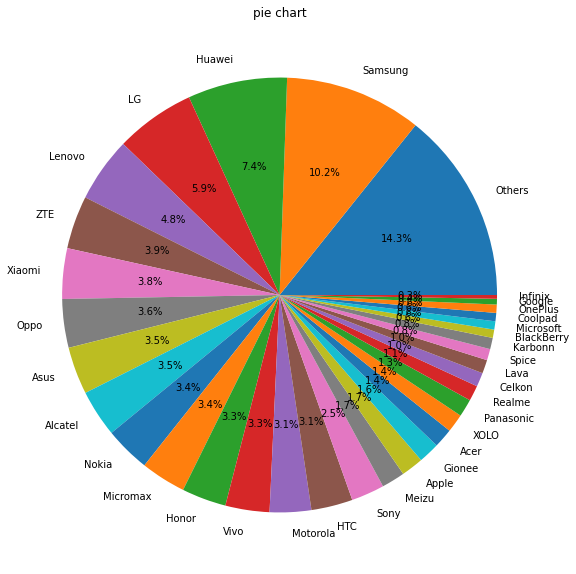

In [21]:
#brand Name
display((df.brand_name.value_counts(normalize = True)*100).nlargest(6))

df.brand_name.value_counts().plot.pie(figsize=(10,10), title = 'pie chart', autopct='%.1f%%')
plt.ylabel('')
plt.show()

There are many phone producers in the market and each command a piece of the pie. Alot of the manufacturers are unsurprisingly asian. The top 5 (all Asian) account for almost 30% of the market: Samsumg(10.2%), Huawei(7.4%), LG(5.9%), Lenovo (4.8%), ZTE(3.9%). With a lot more hovering around the 3-4% share. 

Android    90.898908
Others      5.656679
Windows     1.876225
iOS         1.568188
Name: os, dtype: float64

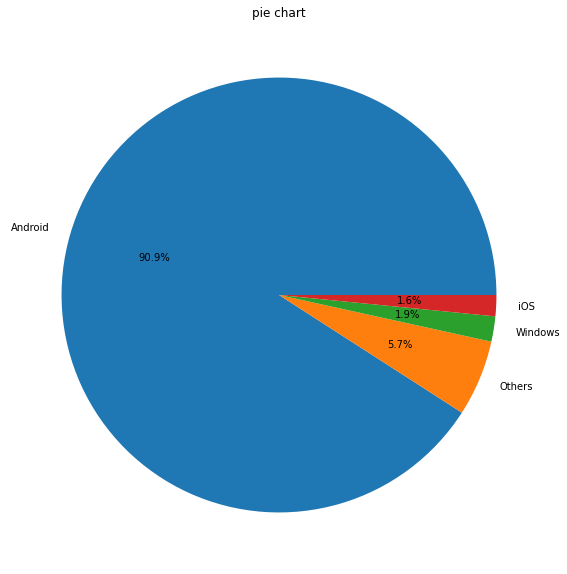

In [22]:
# Operating System
display((df.os.value_counts(normalize = True)*100))
df.os.value_counts().plot.pie(figsize=(10,10), title = 'pie chart', autopct='%.1f%%')
plt.ylabel('')
plt.show()

Seems Android phones significantly dominate the used phone market at about 90% with windows taking about 1.9% and IOS taking 1.6%. This result not completely unsurprising because Apple is known to have sentimental value and owner would want to hang on to their phone longer and more importantly Apple transfer of ownership is not as seemless as with Android due to the closed nature of IOS operating systems. 

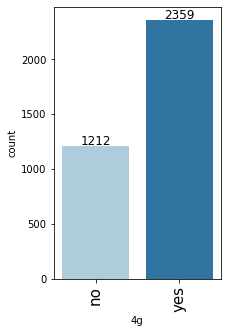

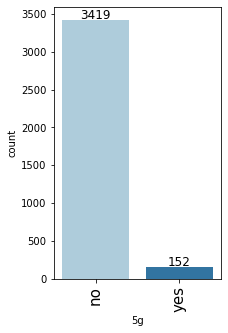

In [23]:
# connectivity 
labeled_barplot(df, feature='4g')
plt.show()

labeled_barplot(df, feature='5g')

count    3571.000000
mean        9.781837
std         6.179739
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        64.000000
Name: main_camera_mp, dtype: float64

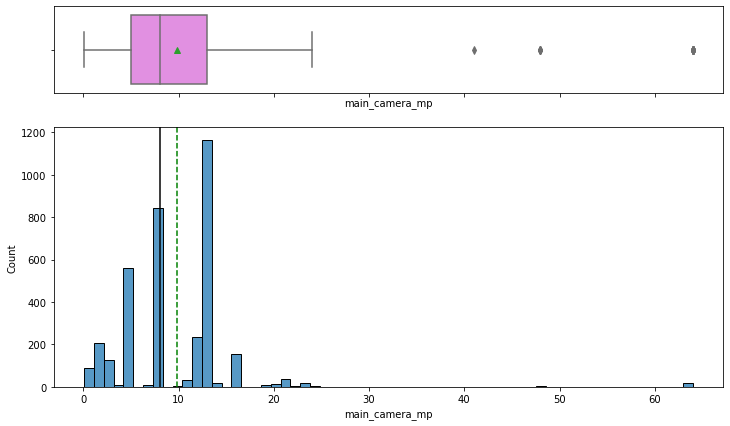

In [24]:
histogram_boxplot(df, feature= 'main_camera_mp')
df.main_camera_mp.describe()

The majority of the main camera mega pixels seem to have an average around 10 Mega pixels. There are a couple of outliers that have more mega **pixels** . The mean is greater than the median which indicates that the data is right skewed.

count    3571.000000
mean        6.548166
std         6.877517
min         0.300000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

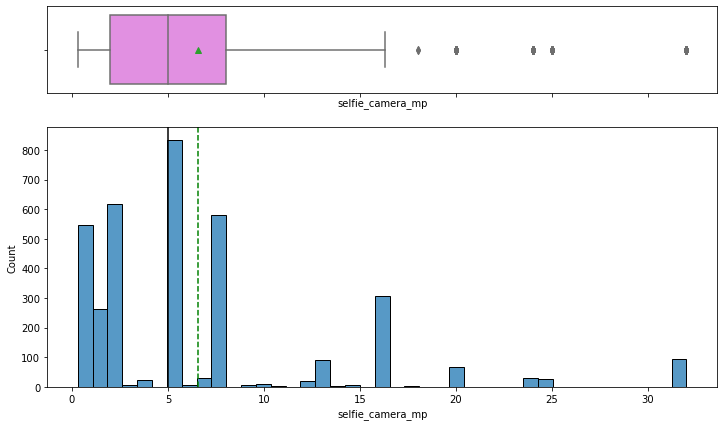

In [25]:
histogram_boxplot(df, feature= 'selfie_camera_mp')
df.selfie_camera_mp.describe()

We see the same distribution as the main camera mega pixel. The mean selfie camera mega pixel is higher that the median which indicates right skew as well. There seems to be more of a variation in the selfie Camera pixel 

screen_size
count    3571.000000
mean       14.803892
std         5.153092
min         2.700000
25%        12.700000
50%        13.490000
75%        16.510000
max        46.360000
Name: screen_size, dtype: float64
main_camera_mp
count    3571.000000
mean        9.781837
std         6.179739
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        64.000000
Name: main_camera_mp, dtype: float64
selfie_camera_mp
count    3571.000000
mean        6.548166
std         6.877517
min         0.300000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64
int_memory
count    3571.000000
mean       54.469509
std        84.585924
min         0.005000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64
ram
count    3571.000000
mean        4.056802
std         1.389897
min         0.030000
25%         4.000000
50%         4.000000


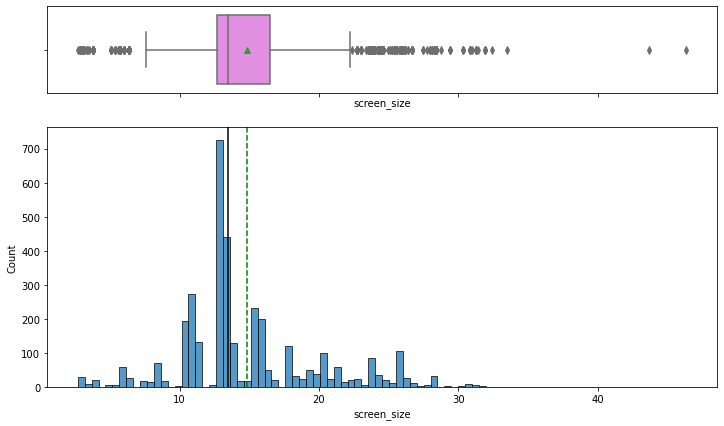

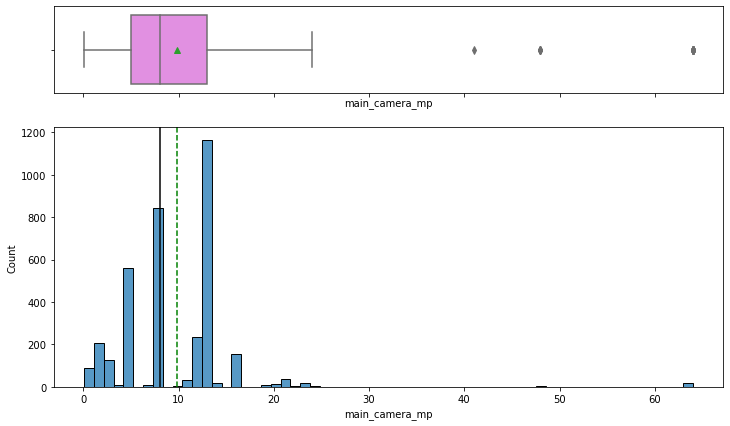

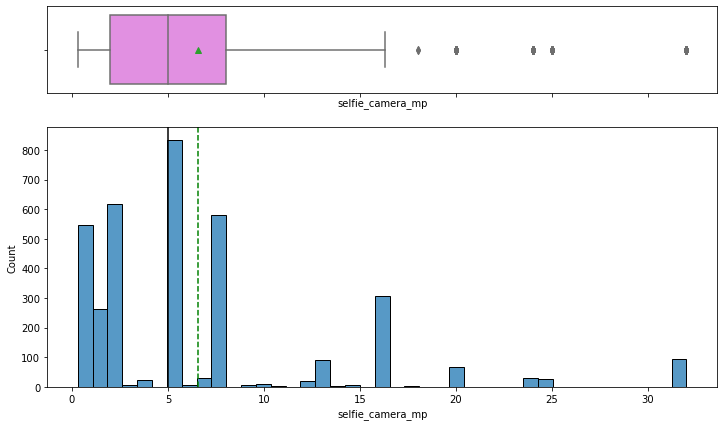

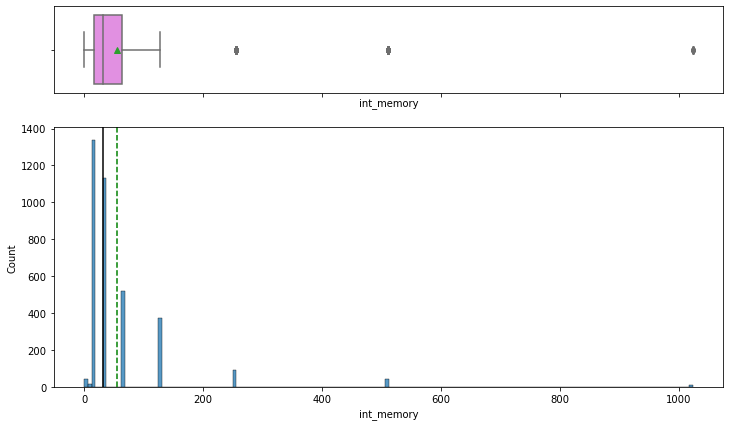

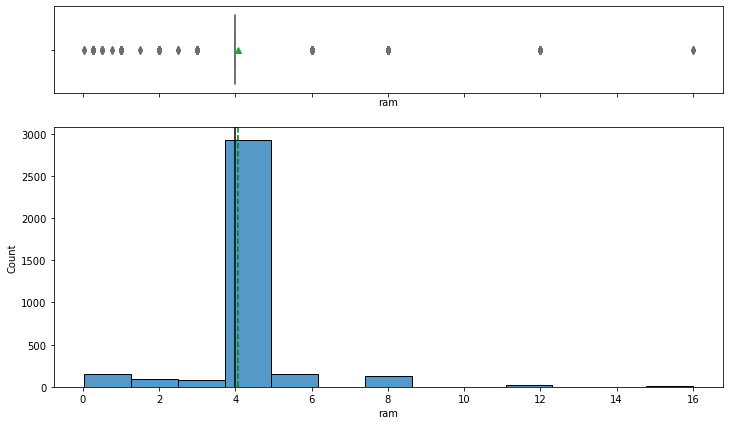

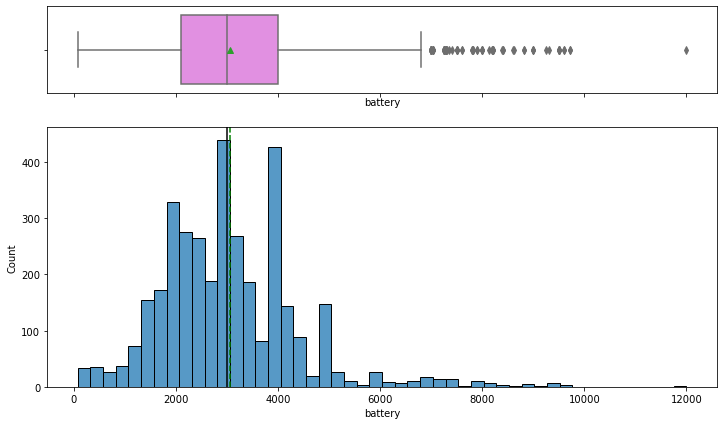

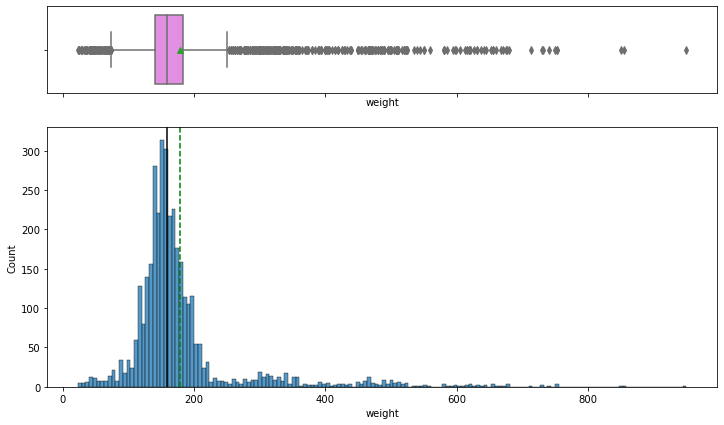

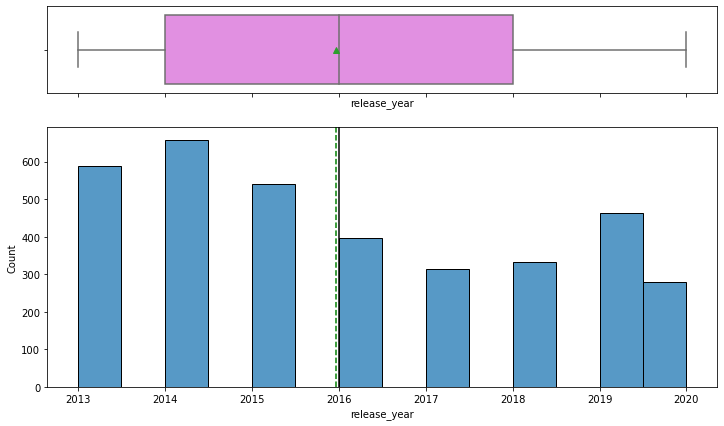

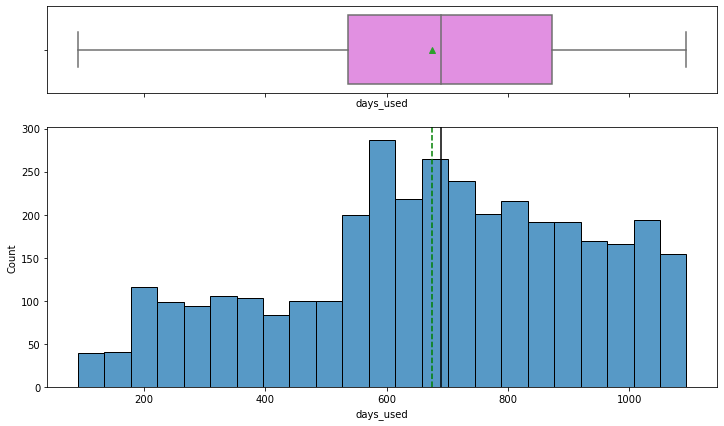

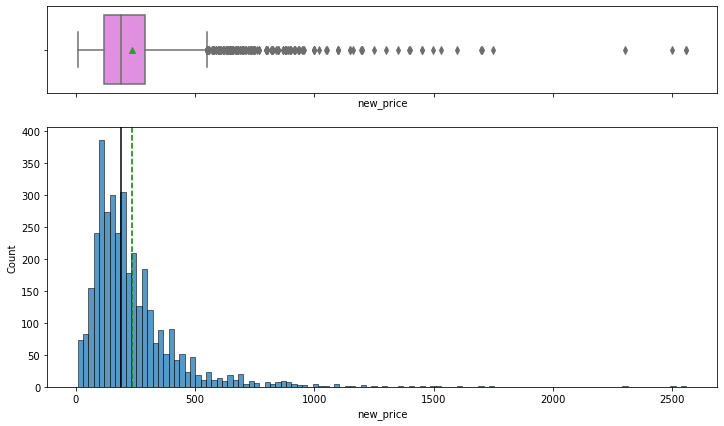

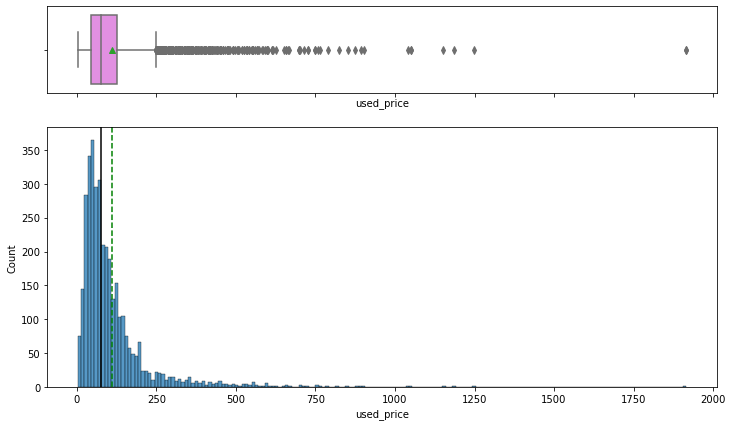

In [26]:
for col in df.select_dtypes(include=['int64','float64']).columns.to_list():
  print(col)
  histogram_boxplot(df, feature = col)
  print(df[col].describe())

**Screen Size:**  
The mean screen size is about 14.80 which is more than the median the graph will likely have a right skew. Majority of the the screens are lest than 16.5 with a few reaching 46.

**Main Camera Mega Pixel**  
The mean main camera mega pixel is about 9.7 , ranging from 0.08 to about 64MP. A maority of the phones are about , or below 13 MPs

**Selfie Camera Mega Pixel**.  
the mean selfie camera is about 6.5 MP and ranges from 0.3 to about 32 MP. a majority of the phones have about, or less, 5 MPs. The distribution presents a right skew.

**Internal Memory**  
The mean size of 54.5 GB ranging from no internal storage to about 1TB of storage space. a mahority are in the 0-64GB range with a few outliers around the 1TB space. 

**RAM**  
The mean is about 4 GB ranging from about no Ram to about 16 GB of RAM. A majority of the phones have RAM around 4GB. Which seems reasonable for newer phones.

**Battery**. 
The mean battery capacity is about 3065 mAh. Again we see thatt the mean is slightly larger than the median and that there are outlining values that may contribute to this.

Screen Size:
The mean screen size is about 15 and the median is about 13.5. The screen size data look right skewed, we may have some phones that are unsually big for this market. The screen size for phones varies. It would be interesting to see if screen size is an important factor for the purchase of a used phone.



# **Bivariate Analysis**

In [27]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.216359,0.370237,0.144414,0.282166,0.740856,0.635031,0.454596,-0.397210,0.342092,0.385928
main_camera_mp,0.216359,1.000000,0.405026,0.059967,0.265135,0.243246,-0.043955,0.354715,-0.208570,0.322220,0.296439
selfie_camera_mp,0.370237,0.405026,1.000000,0.283494,0.444948,0.345433,-0.004693,0.696645,-0.555998,0.398476,0.496741
int_memory,0.144414,0.059967,0.283494,1.000000,0.079594,0.114380,0.019073,0.219439,-0.228819,0.343452,0.405106
ram,0.282166,0.265135,0.444948,0.079594,1.000000,0.233910,0.069796,0.311354,-0.286664,0.442881,0.522287
battery,0.740856,0.243246,0.345433,0.114380,0.233910,1.000000,0.700430,0.457428,-0.351751,0.341946,0.364073
weight,0.635031,-0.043955,-0.004693,0.019073,0.069796,0.700430,1.000000,0.062854,-0.060033,0.198642,0.171281
release_year,0.454596,0.354715,0.696645,0.219439,0.311354,0.457428,0.062854,1.000000,-0.748594,0.296972,0.456764
days_used,-0.397210,-0.208570,-0.555998,-0.228819,-0.286664,-0.351751,-0.060033,-0.748594,1.000000,-0.235613,-0.470760
new_price,0.342092,0.322220,0.398476,0.343452,0.442881,0.341946,0.198642,0.296972,-0.235613,1.000000,0.926087


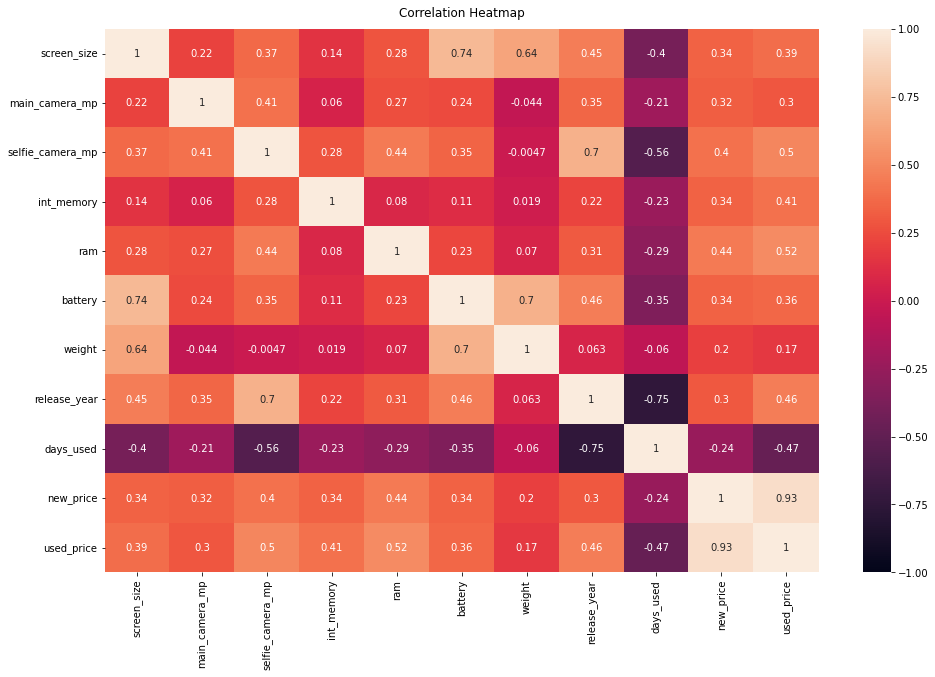

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True).set_title('Correlation Heatmap',fontdict={'fontsize':12}, pad=12)
plt.savefig("recell.jpg", bbox_inches='tight')
plt.show()

### 3. EDA - Pre-processing  
1. What does the distribution of used phone prices look like?  
2. What percentage of the used phone market is dominated by Android devices?  
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?  
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?  
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

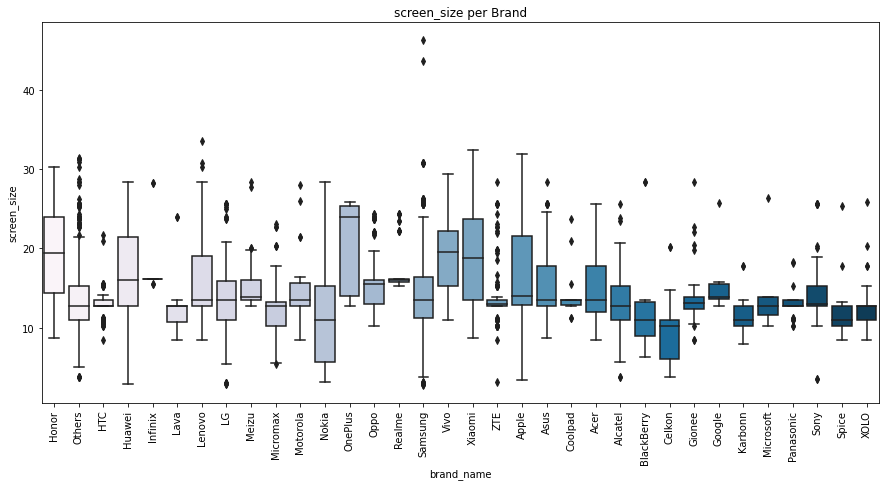

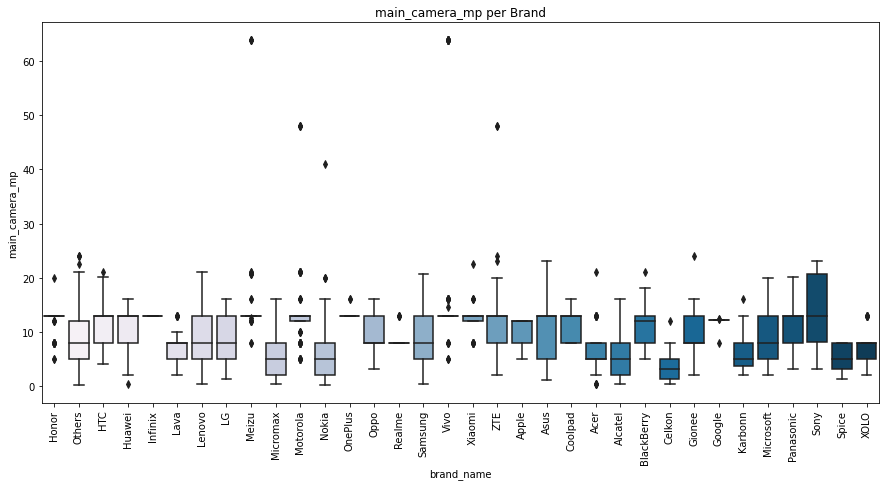

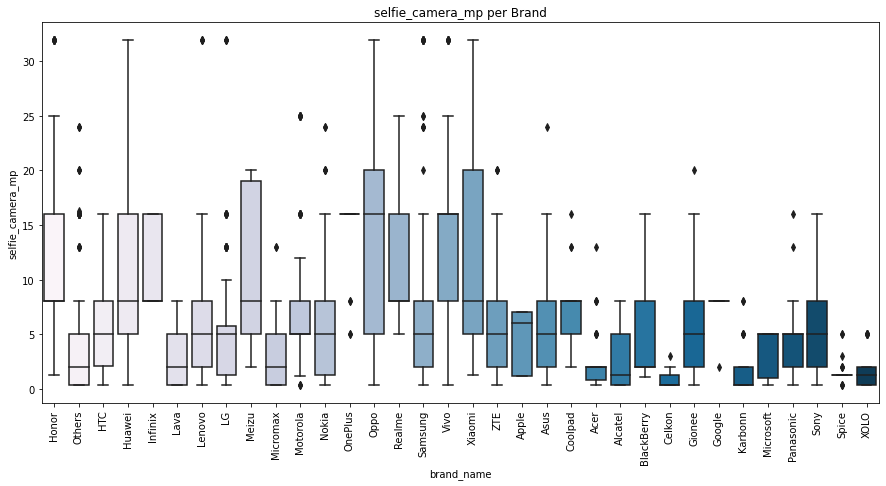

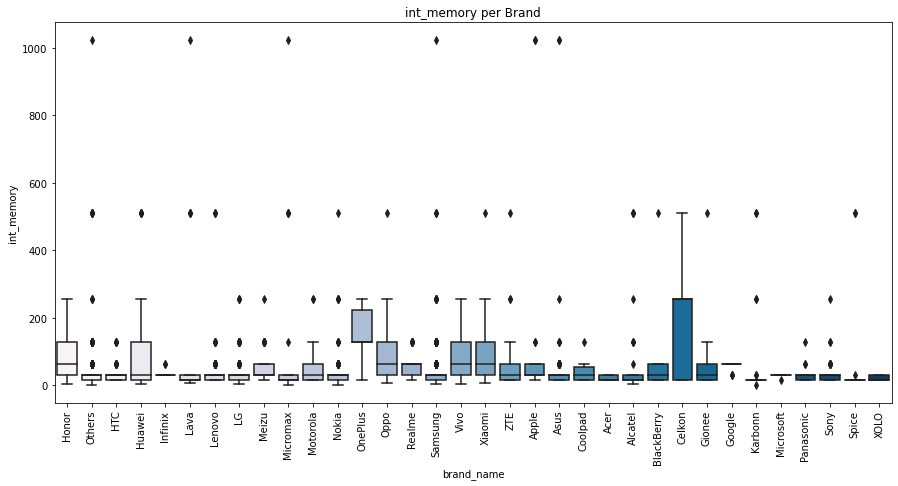

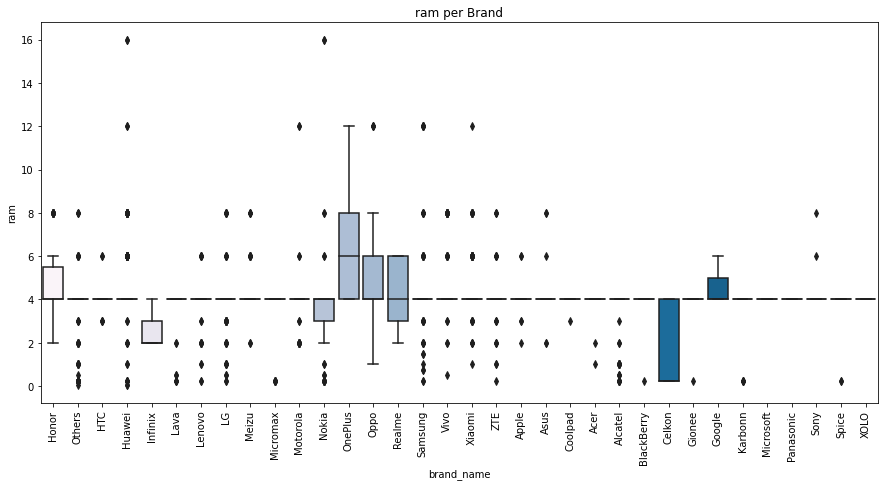

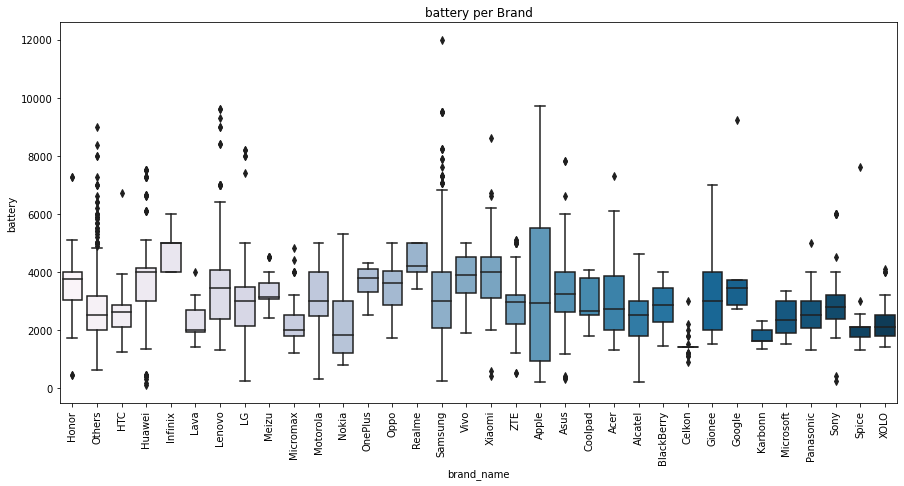

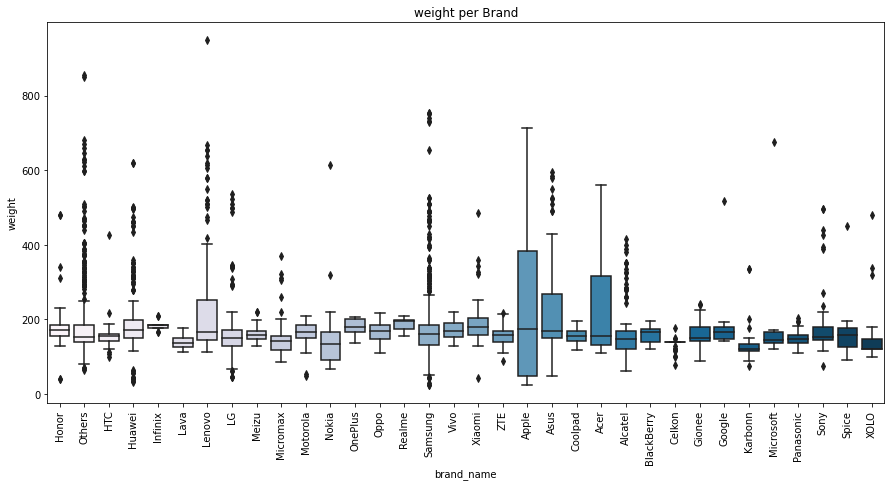

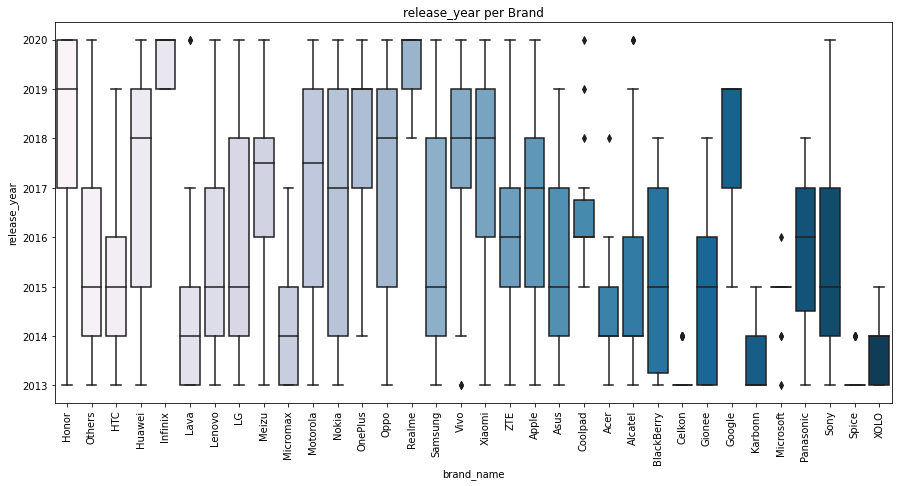

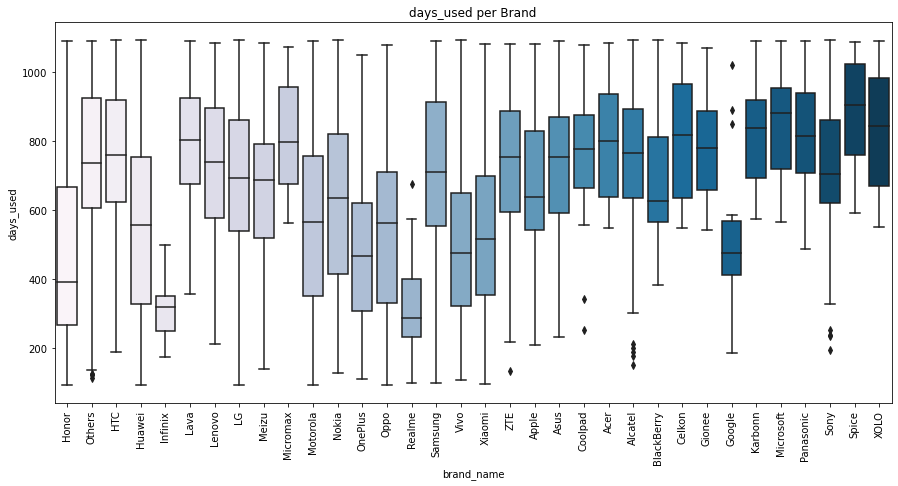

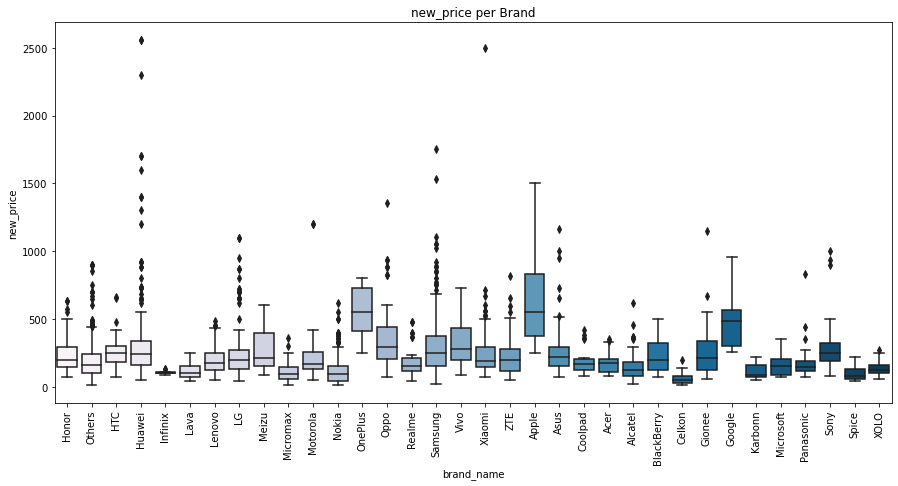

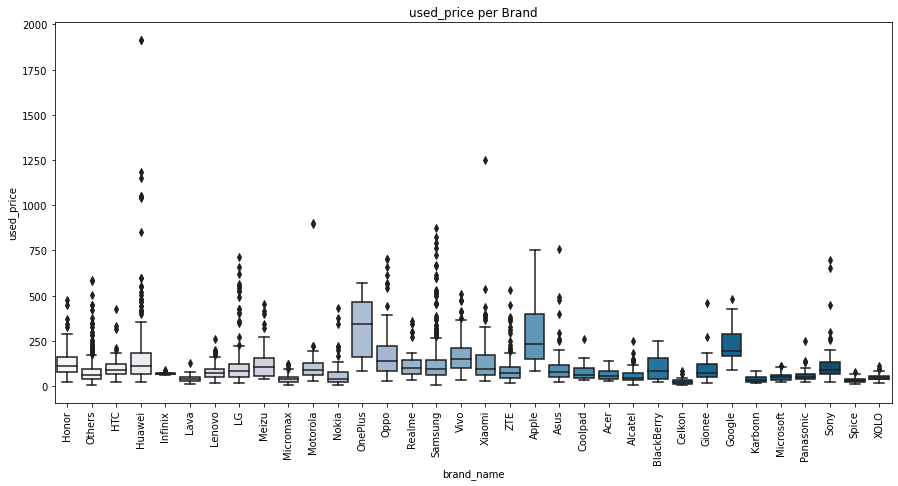

In [29]:
# Does the brand have any effect ?
for col in df.select_dtypes(include=['int64','float64']).columns.to_list():
  plt.figure(figsize=(15,7))
  sns.boxplot(x = "brand_name", y = col, data = df, palette = 'PuBu').set_title('{} per Brand'.format(col))
  plt.xticks(rotation = 90)
  plt.show()


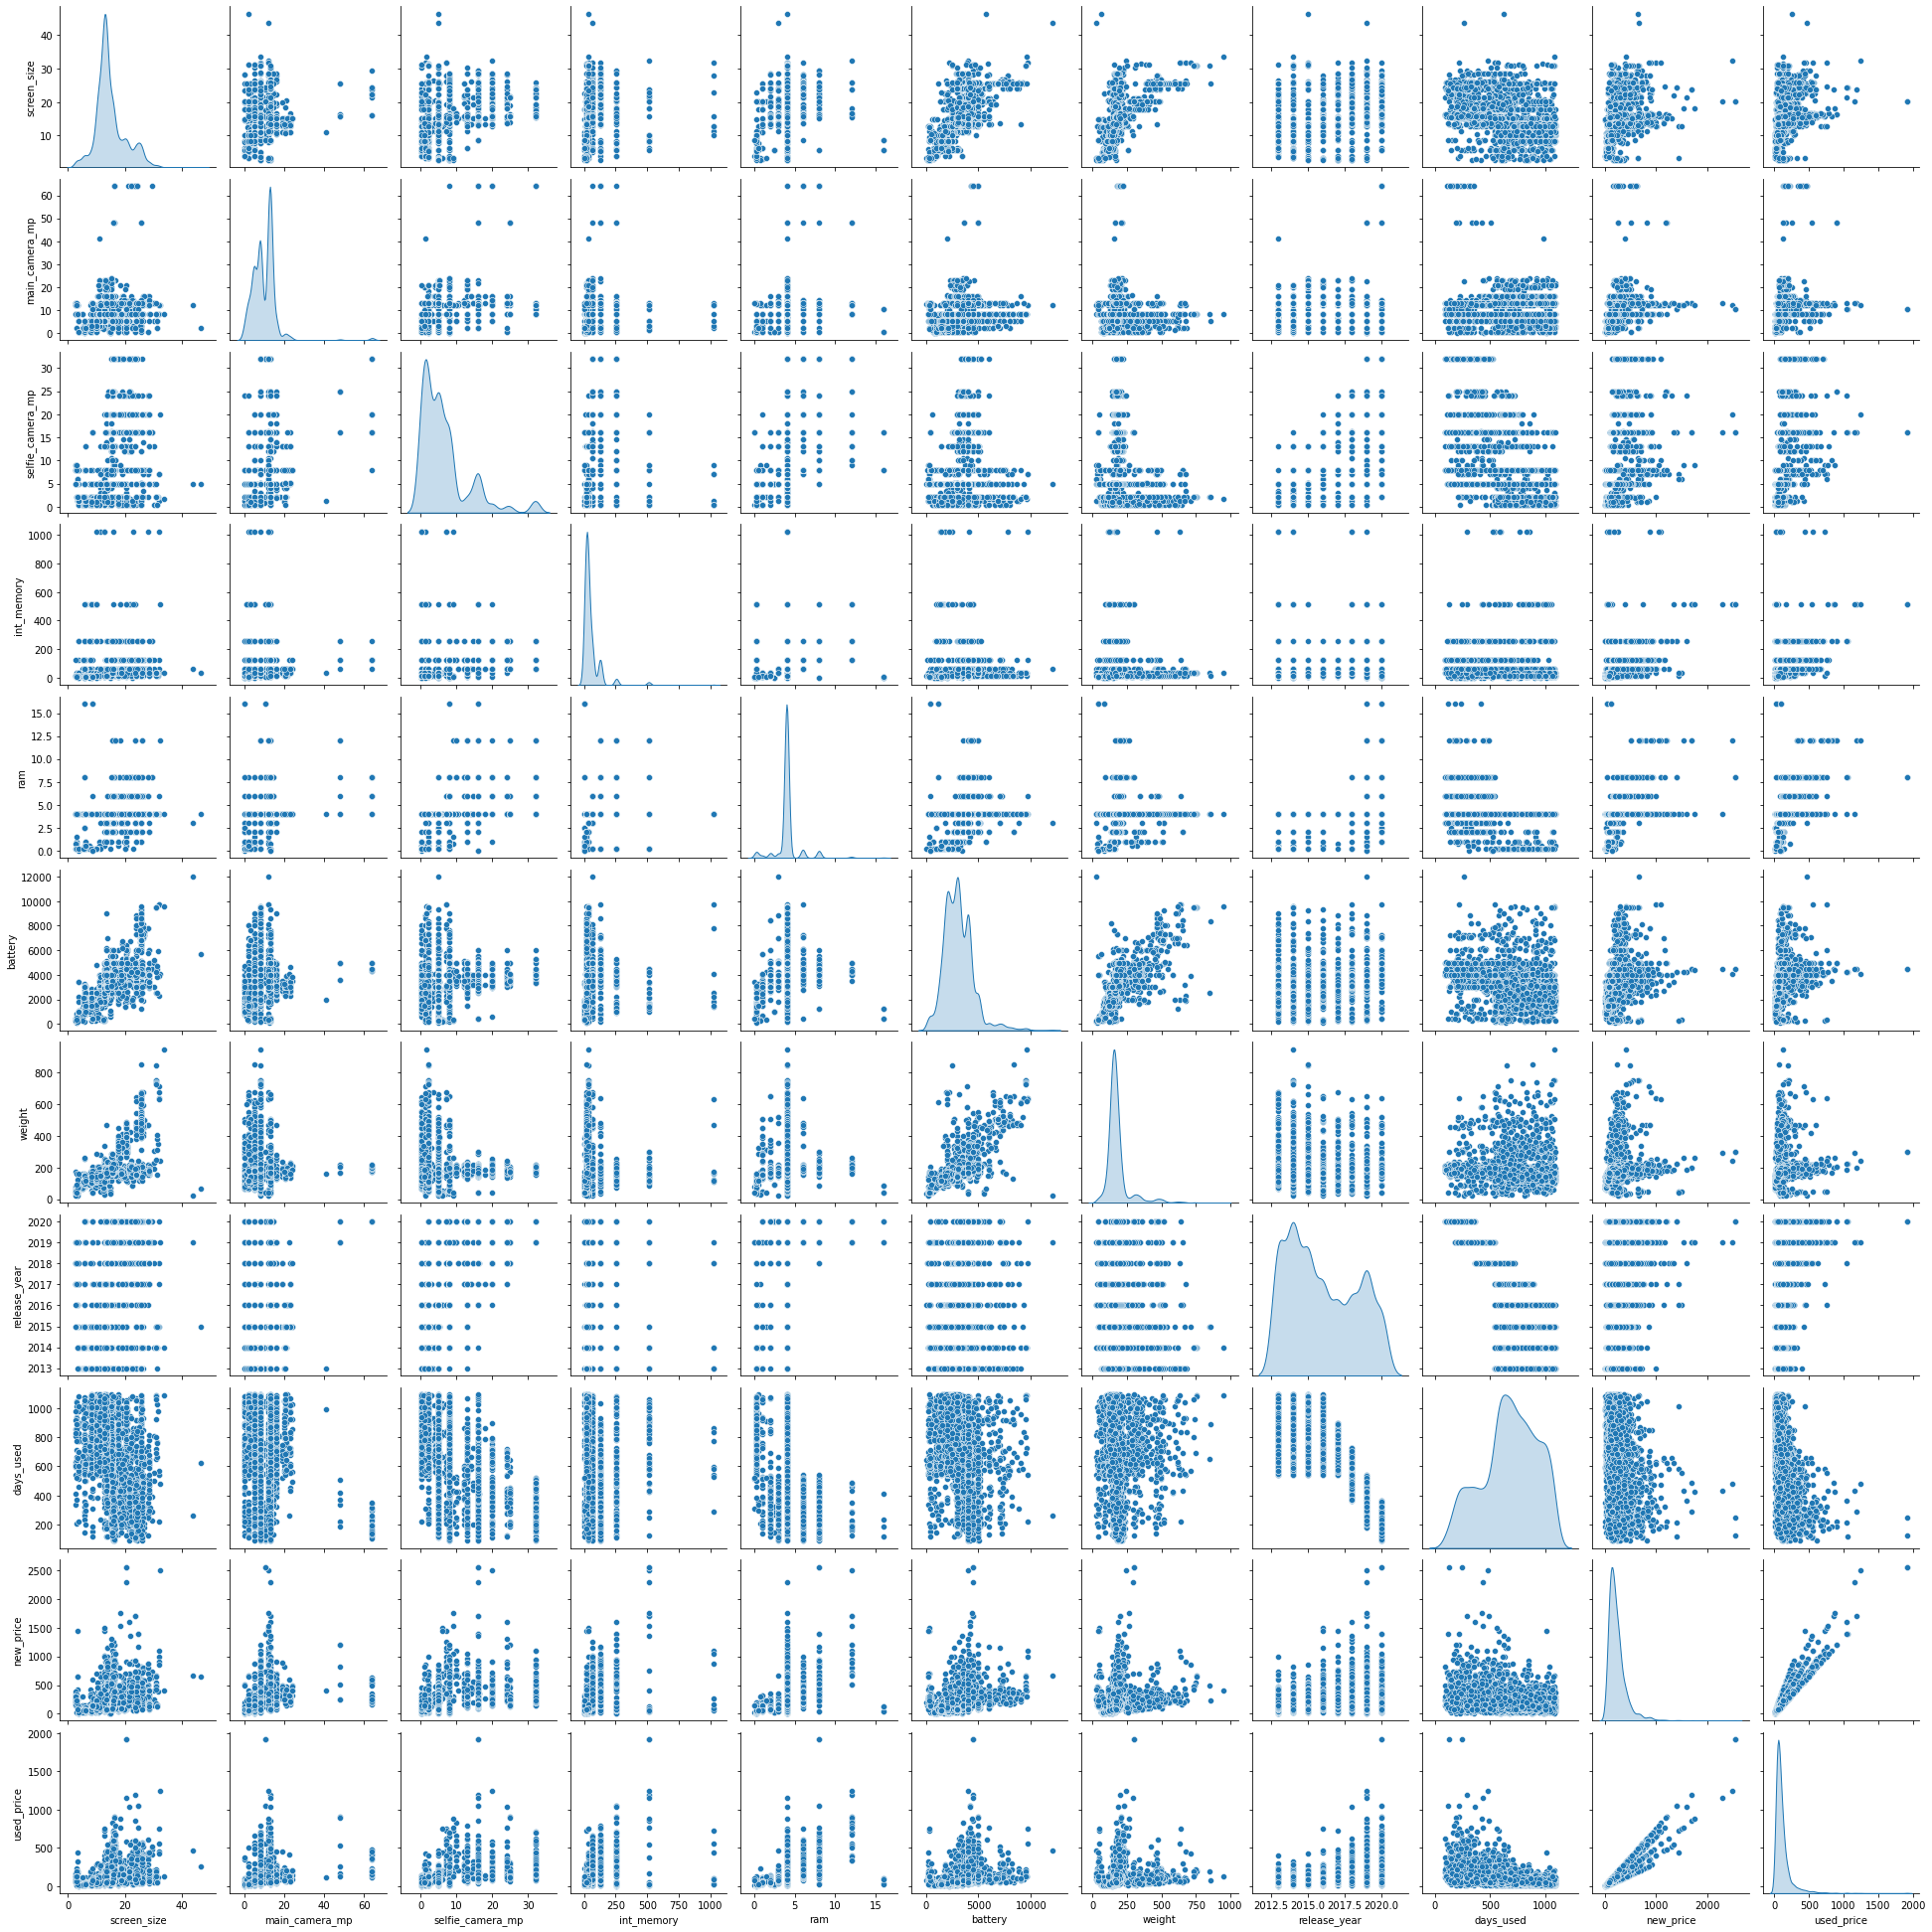

In [30]:
sns.pairplot(df, diag_kind='kde')
plt.show()

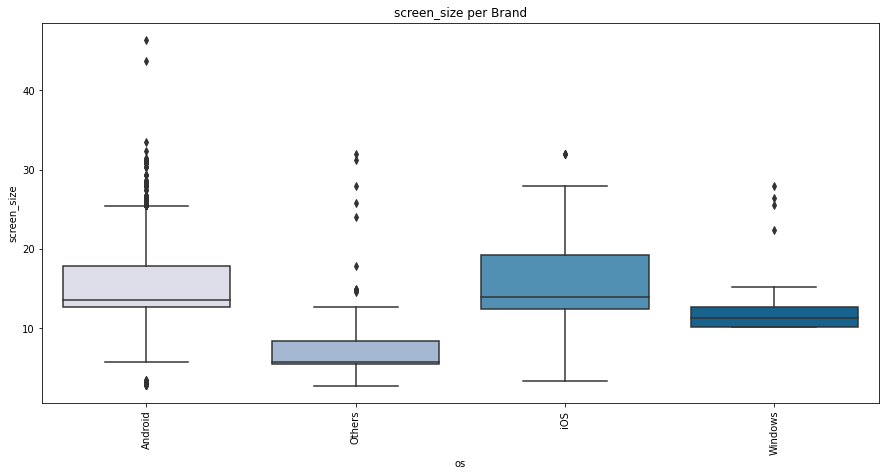

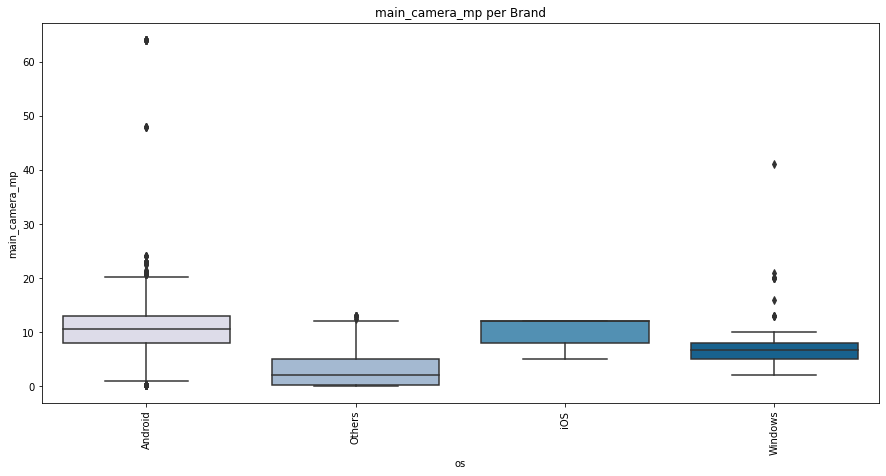

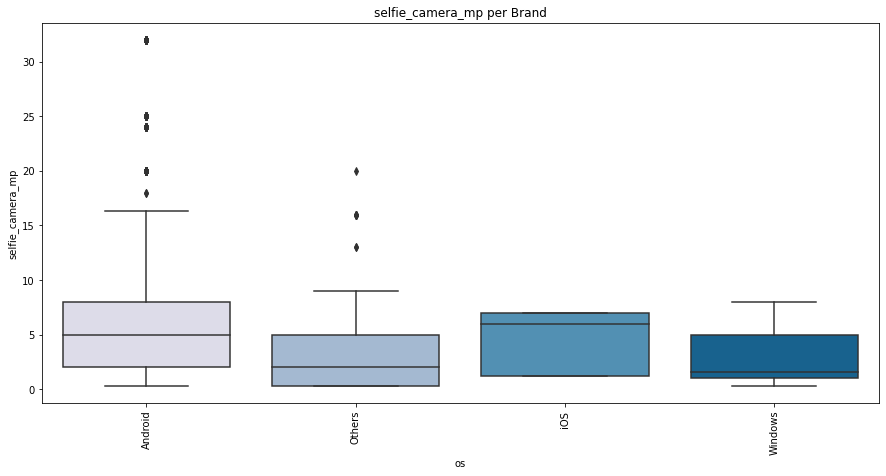

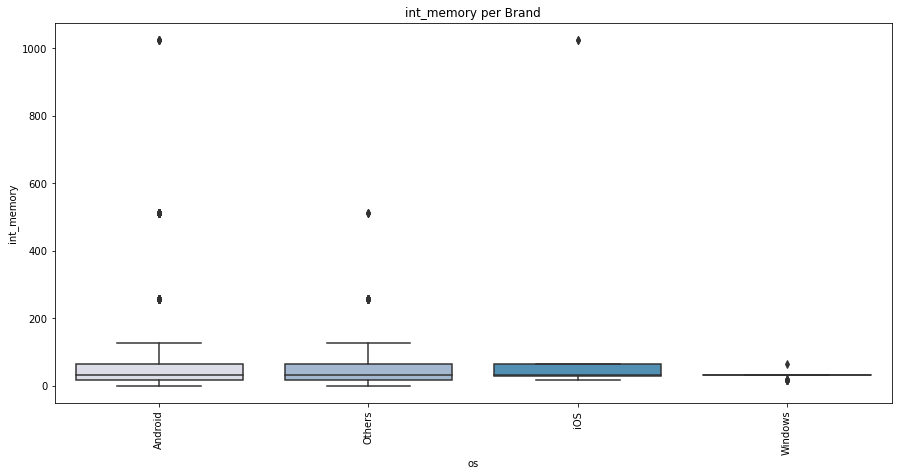

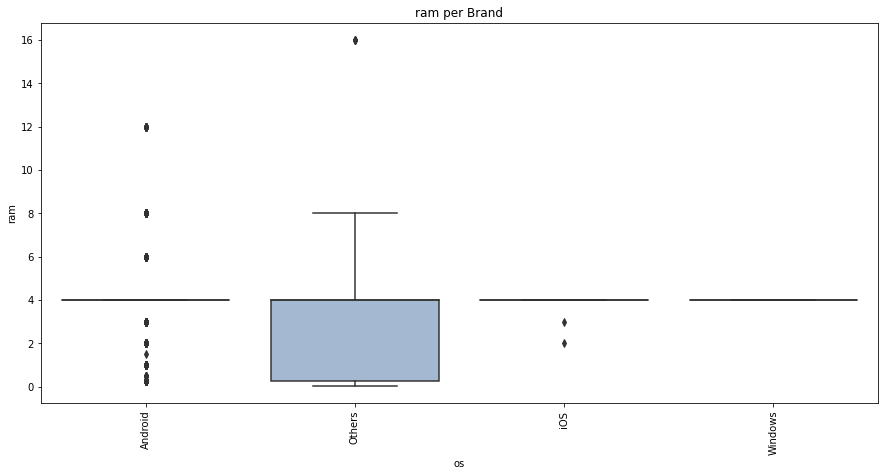

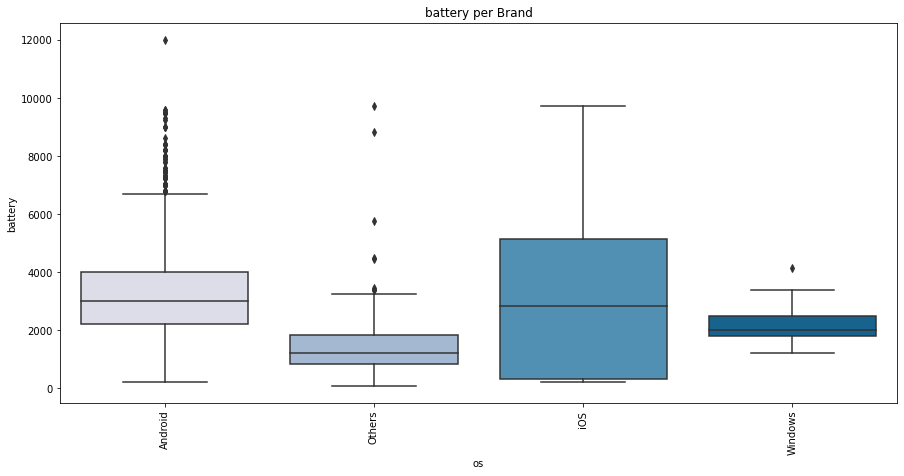

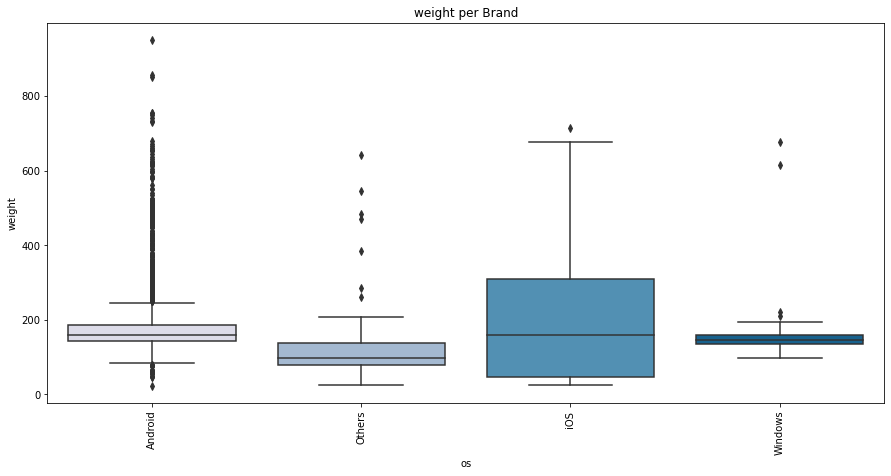

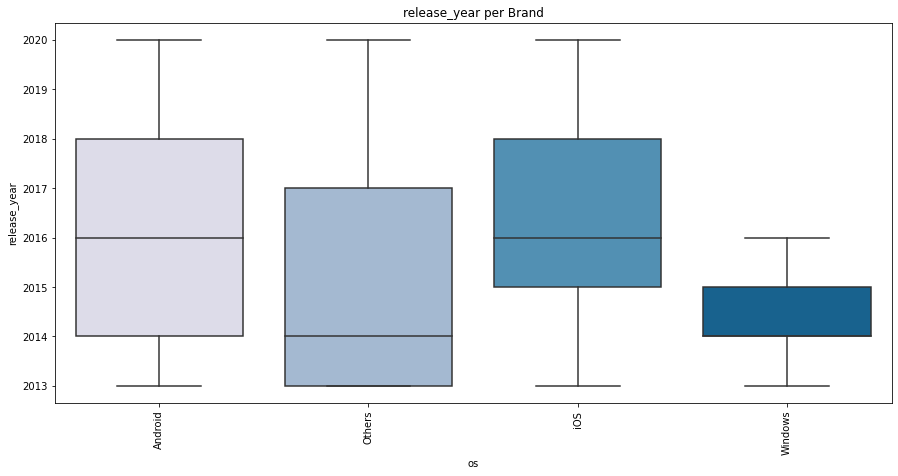

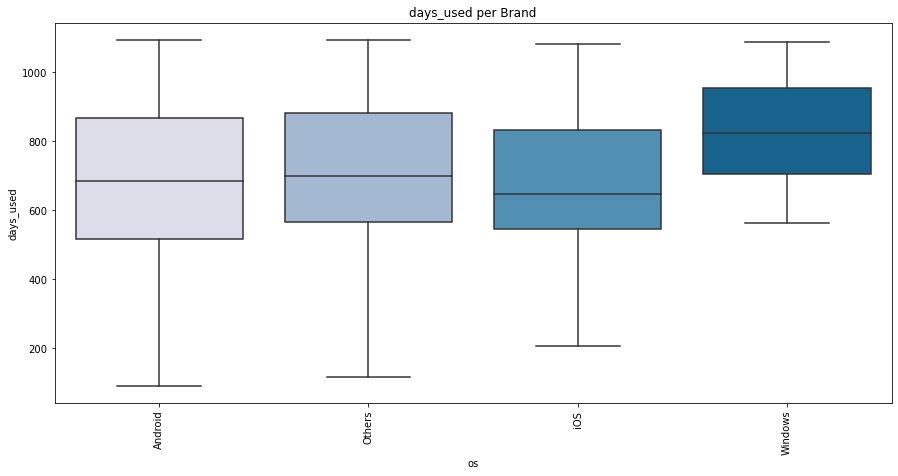

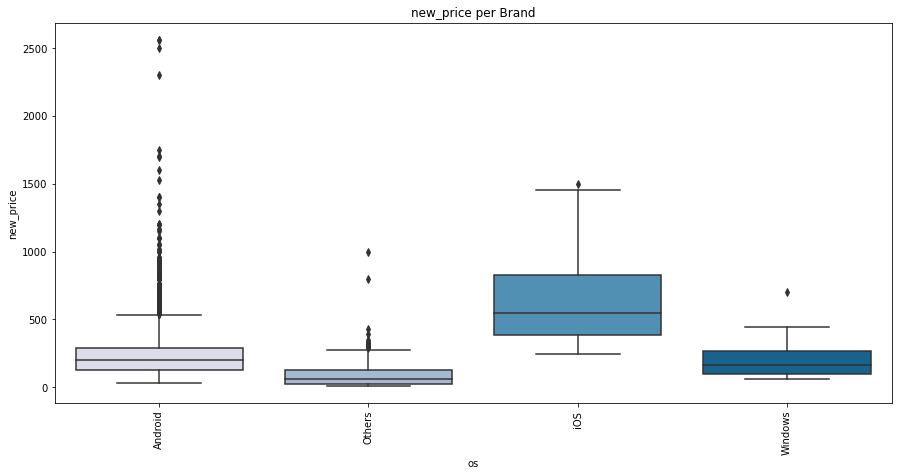

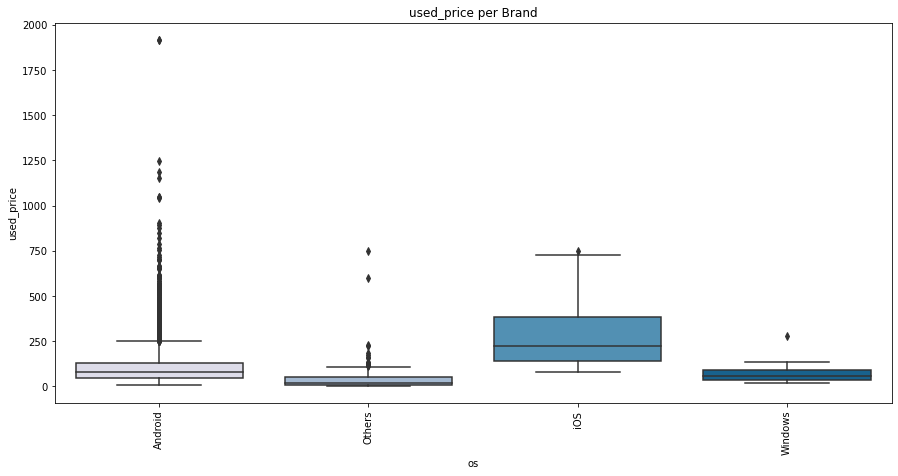

In [31]:
# DOes the operating system have any effect?
for col in df.select_dtypes(include=['int64','float64']).columns.to_list():
  plt.figure(figsize=(15,7))
  sns.boxplot(x = "os", y = col, data = df, palette = 'PuBu').set_title('{} per Brand'.format(col))
  plt.xticks(rotation = 90)
  plt.show()

# **Build / Fit Model**

We are going to use 2 linear regressions to model this data i) simple multi variable Linear regression and ii) OLS 

Split Data, X,Y and 



In [32]:
for col in df.select_dtypes(include=['object']).columns.to_list():
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3571 non-null   float64 
 6   selfie_camera_mp  3571 non-null   float64 
 7   int_memory        3571 non-null   float64 
 8   ram               3571 non-null   float64 
 9   battery           3571 non-null   float64 
 10  weight            3571 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.8 KB


In [33]:
X = df.drop('used_price', axis=1)
y = df['used_price']

In [34]:
X = pd.get_dummies(X,columns=X.select_dtypes(include='category').columns.to_list(), drop_first=True)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

## Linear Regression -Simple

In [36]:
model = LinearRegression().fit(X_train,y_train)

In [37]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,model.coef_[idx]))

The coefficient for screen_size is -0.4172850768015103
The coefficient for main_camera_mp is -0.8494863454210877
The coefficient for selfie_camera_mp is -0.35981277069152384
The coefficient for int_memory is 0.05373783498839004
The coefficient for ram is 4.301648772947713
The coefficient for battery is -0.00013264421799892548
The coefficient for weight is -0.012462747890361473
The coefficient for release_year is 2.9363096653436584
The coefficient for days_used is -0.11015296214557158
The coefficient for new_price is 0.5244043714011093
The coefficient for brand_name_Alcatel is 5.180257583595106
The coefficient for brand_name_Apple is 160.68682086763013
The coefficient for brand_name_Asus is -4.413155409241312
The coefficient for brand_name_BlackBerry is -0.8175722483289468
The coefficient for brand_name_Celkon is 13.460241085131313
The coefficient for brand_name_Coolpad is 1.8363100906968326
The coefficient for brand_name_Gionee is -15.185050460629972
The coefficient for brand_name_Goog

In [38]:
print(f'The r^2 of the model is {model.score(X_train, y_train)} and the intercept is {model.intercept_}')

The r^2 of the model is 0.9473915798585109 and the intercept is -5853.790769362143


In [39]:
y_pred = model.predict(X_test)

In [40]:
import math
# RMSE
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print(f'The RMSE of the model is {RMSE}')

The RMSE of the model is 26.69123025467971


## Linear Regression - OLS

Using another method for linear regression to confirm the already formed model

In [41]:
#Import the the stats library that has the OLS method
import statsmodels.api as sm 

In [42]:
X1 = X

In [43]:
# As part of the OLS method, add a constant to the independent variables to produce an intercept
X1 = sm.add_constant(X1)

In [44]:
# Split the data
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.3, random_state=1)

In [45]:
# fit the model
model_1= sm.OLS(y1_train, X1_train).fit()

In [46]:
# print out the results of the model fitting
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     919.2
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:55:56   Log-Likelihood:                -11893.
No. Observations:                2499   AIC:                         2.388e+04
Df Residuals:                    2450   BIC:                         2.417e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5853.79

In [47]:
y1_pred = model_1.predict(X1_test)

In [48]:
MSE_1 = mean_squared_error(y1_test, y1_pred)
RMSE_1 = math.sqrt(MSE)
print(f'The RMSE of the model is {RMSE}')


The RMSE of the model is 26.69123025467971


In [49]:
vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('VIF values: \n\n{}\n'.format(vif_series))

VIF values: 

screen_size               30.135412
main_camera_mp             5.758626
selfie_camera_mp           4.558807
int_memory                 1.942073
ram                       17.525792
battery                   22.109133
weight                    14.636655
release_year             129.179652
days_used                 15.337938
new_price                  4.882542
brand_name_Alcatel         3.198789
brand_name_Apple          23.583462
brand_name_Asus            3.597251
brand_name_BlackBerry      1.530587
brand_name_Celkon          1.830037
brand_name_Coolpad         1.398609
brand_name_Gionee          2.174185
brand_name_Google          1.275937
brand_name_HTC             3.377502
brand_name_Honor           3.425162
brand_name_Huawei          6.551696
brand_name_Infinix         1.269470
brand_name_Karbonn         1.683115
brand_name_LG              5.414583
brand_name_Lava            1.722522
brand_name_Lenovo          4.471610
brand_name_Meizu           2.304203
brand_name_Mic

# Model Fine Tune
This part of the code is to remove variables and see which ones have the most effect

In [50]:
X1 = df.drop(['used_price','brand_name','weight','os', 'battery','main_camera_mp','selfie_camera_mp'], axis=1)
y1 = df['used_price']

In [51]:
X1 = pd.get_dummies(X1,columns=X1.select_dtypes(include='category').columns.to_list(), drop_first=True)

In [52]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3, random_state=1)

## Linear Regression -Simple

In [53]:
model = LinearRegression().fit(X1_train,y1_train)

In [54]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name,model.coef_[idx]))

The coefficient for screen_size is -0.5539539589279906
The coefficient for int_memory is 0.062497826962702945
The coefficient for ram is 3.6898285865112763
The coefficient for release_year is 1.6256236713451884
The coefficient for days_used is -0.11016940919607254
The coefficient for new_price is 0.5098751313475658
The coefficient for 4g_yes is -15.707796569849757
The coefficient for 5g_yes is 60.61976625334174


In [55]:
print(f'The r^2 of the model is {model.score(X1_train, y1_train)} and the intercept is {model.intercept_}')

The r^2 of the model is 0.94139664299615 and the intercept is -3216.1146941157986


In [56]:
y1_pred = model.predict(X1_test)

In [57]:
import math
# RMSE
MSE = mean_squared_error(y1_test, y1_pred)
RMSE = math.sqrt(MSE)
print(f'The RMSE of the model is {RMSE}')

The RMSE of the model is 26.616785995438928


## Linear Regression - OLS

Using another method for linear regression to confirm the already formed model

In [58]:
#Import the the stats library that has the OLS method
import statsmodels.api as sm 

In [59]:
X1_ols = X1
y_ols = y1

In [60]:
# As part of the OLS method, add a constant to the independent variables to produce an intercept
X1_ols = sm.add_constant(X1)

In [61]:
# Split the data
X1_ols_train,X1_ols_test,y1_ols_train,y1_ols_test = train_test_split(X1_ols,y_ols,test_size=0.3, random_state=1)

In [62]:
# fit the model
model1_ols= sm.OLS(y1_ols_train, X1_ols_train).fit()

In [63]:
# print out the results of the model fitting
print(model1_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5000.
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:55:57   Log-Likelihood:                -12028.
No. Observations:                2499   AIC:                         2.407e+04
Df Residuals:                    2490   BIC:                         2.413e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3216.1147    967.083     -3.326   

In [64]:
y1_ols_pred = model1_ols.predict(X1_ols_test)

In [65]:
MSE_1 = mean_squared_error(y1_ols_test, y1_ols_pred)
RMSE1_ols = math.sqrt(MSE)
print(f'The RMSE of the model is {RMSE}')


The RMSE of the model is 26.616785995438928


In [66]:
vif_series = pd.Series([variance_inflation_factor(X1_ols_train.values,i) for i in range(X1_ols_train.shape[1])],index=X1_ols_train.columns)
print('VIF values: \n\n{}\n'.format(vif_series))

VIF values: 

const           2.624013e+06
screen_size     1.364277e+00
int_memory      1.234212e+00
ram             1.570277e+00
release_year    3.404244e+00
days_used       2.486632e+00
new_price       1.554851e+00
4g_yes          1.748392e+00
5g_yes          1.595217e+00
dtype: float64

